In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import cv2
import datetime
import sklearn
import cufflinks as cf


from chart_studio import plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from pandas_datareader import data, wb

%matplotlib inline

Data Gathering

In [86]:
train = pd.read_csv(r".\data\titanic_train.csv")

Data pre-processing

In [87]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [89]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [90]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

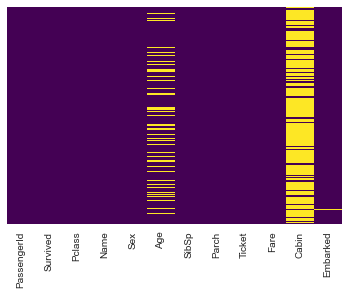

In [91]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [92]:
sns.set_style('whitegrid')

(<AxesSubplot:xlabel='Survived', ylabel='count'>,)

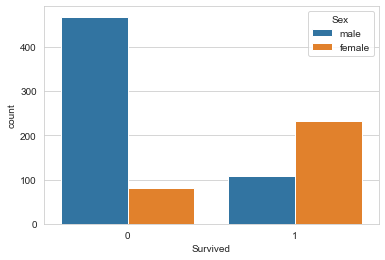

In [93]:
sns.countplot(data=train, x="Survived", hue='Sex'), #palette='RdBu_r')

(<AxesSubplot:xlabel='Survived', ylabel='count'>,)

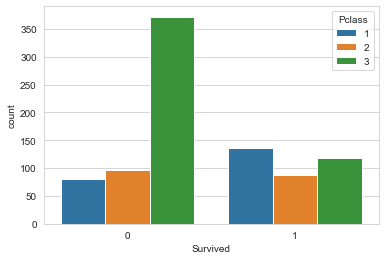

In [94]:
sns.countplot(data=train, x="Survived", hue='Pclass'), #palette='RdBu_r')

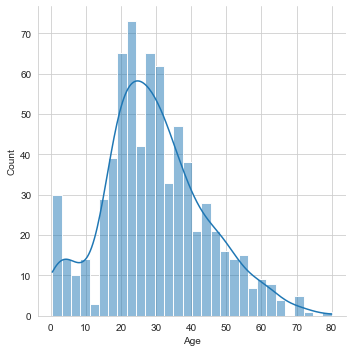

In [95]:
sns.displot(train['Age'].dropna(),kde=True,bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

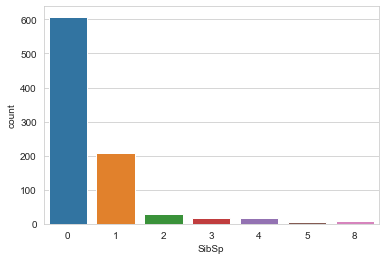

In [96]:
sns.countplot(data=train, x='SibSp')

<AxesSubplot:>

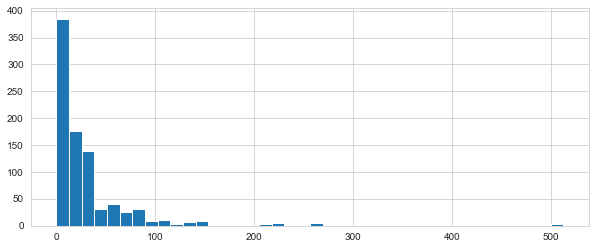

In [97]:
train['Fare'].hist(bins=40, figsize=(10,4))

In [98]:
import cufflinks as cf

In [99]:
cf.go_offline()

In [100]:
train['Fare'].iplot(kind='hist', bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

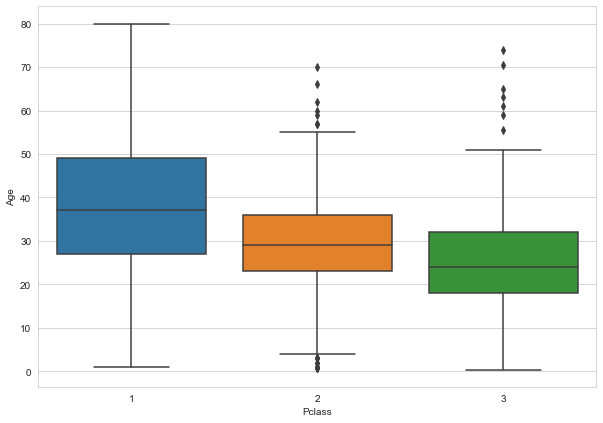

In [101]:
plt.figure(figsize=(10,7))
sns.boxplot(data=train, x='Pclass', y='Age')

In [102]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24

    else:
        return Age

In [103]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

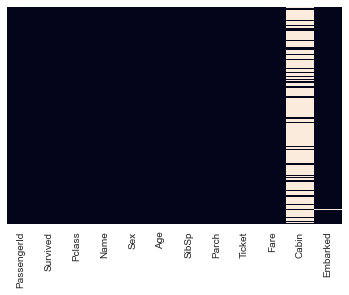

In [104]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False)

In [105]:
train.drop('Cabin', axis=1,inplace=True)

<AxesSubplot:>

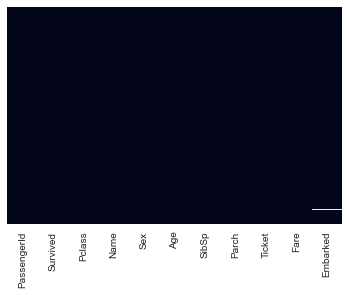

In [106]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False)

In [107]:
train.dropna(inplace=True)

<AxesSubplot:>

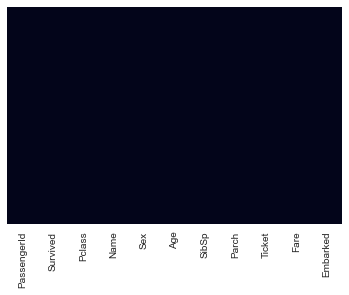

In [108]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [109]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [110]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [111]:
train = pd.concat([train,sex,embark], axis=1)

In [112]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [113]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [114]:
train.drop('PassengerId',axis=1, inplace=True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


Feature Selection

In [118]:
feature = train[["Pclass", "Age", "SibSp", "Parch", "Fare","male","Q","S"]]
target = train[['Survived']]

Test and Train Model

In [119]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(feature, target,test_size=0.3, random_state=101)

In [120]:
xtrain.shape, xtest.shape

((622, 8), (267, 8))

In [121]:
ytrain.shape, ytest.shape

((622, 1), (267, 1))

Modeling

In [123]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(xtrain, ytrain.values.ravel())

C:\Users\hp\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [124]:
predictions = lm.predict(xtest)

In [125]:
from sklearn.metrics import classification_report

In [126]:
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [127]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)

In [128]:
print(lm.intercept_)

[5.22764989]


In [129]:
lm.coef_

array([[-1.20539102e+00, -4.56890432e-02, -2.55799238e-01,
        -2.17119207e-02,  1.34711173e-03, -2.45175622e+00,
         1.15862588e-01, -1.70723530e-01]])

In [130]:
from sklearn import metrics

In [131]:
print("MAE :",metrics.mean_absolute_error(ytest, predictions))
print("MSE :",metrics.mean_squared_error(ytest,predictions))
print("RMSE :",np.sqrt(metrics.mean_squared_error(ytest, predictions)))
print("R2S :",metrics.r2_score(ytest,predictions))

MAE : 0.17228464419475656
MSE : 0.17228464419475656
RMSE : 0.41507185425508747
R2S : 0.27548371873525235


In [132]:
metrics.explained_variance_score(ytest,predictions)

0.28704577630958006